In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

In [28]:
X = iris['data']
y = iris['target']

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
X_scaled = StandardScaler().fit_transform(X)

In [6]:
sil_acc = []
for k in range(2, 8):    
    mod = KMeans(n_clusters=k)
    mod.fit(X_scaled)
    sil_acc.append(silhouette_score(X_scaled, mod.labels_))

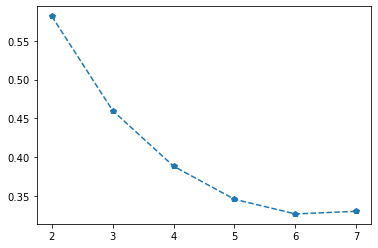

In [7]:
plt.plot(range(2,8), sil_acc, 'p--')

In [8]:
mod = KMeans(n_clusters=3)
mod.fit(X_scaled)
mod.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [9]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [10]:
X, y = make_moons(n_samples=1000, noise=0.05)

In [11]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [12]:
dbscan.fit(X)

DBSCAN(eps=0.2)

In [13]:
from sklearn.mixture import GaussianMixture

In [33]:
gm = GaussianMixture(n_components=3, n_init=10)

In [34]:
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [35]:
gm.means_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54632887, 2.94943079, 5.4834877 , 1.98716063],
       [5.91697517, 2.77803998, 4.20523542, 1.29841561]])

In [37]:
gm.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
gm.aic(X)

448.3914718292037

In [45]:
aic = []
bic = []
for k in range(2,6):
    gm = GaussianMixture(n_components=k, n_init=10)
    gm.fit(X)
    aic.append(gm.aic(X))
    bic.append(gm.bic(X))

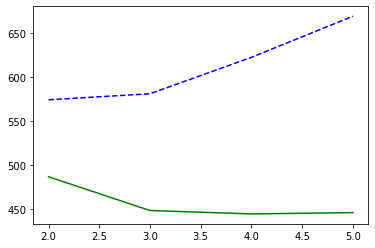

In [46]:
plt.plot(range(2,6), aic, 'g-')
plt.plot(range(2,6), bic,'b--')

In [47]:
from sklearn.mixture import BayesianGaussianMixture

In [48]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)

In [49]:
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [58]:
np.round(bgm.weights_,2)

array([0.47, 0.33, 0.09, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [59]:
from sklearn.datasets import fetch_olivetti_faces

In [61]:
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\vmrod\scikit_learn_data


In [64]:
X = olivetti['data']
y = olivetti['target']

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

In [108]:
spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [109]:
for train_idx, test_idx in spliter.split(X, y):
    X_train = X[train_idx]
    y_train = y[train_idx]
    
    X_test = X[test_idx]
    y_test = y[test_idx]

In [110]:
spliter_val = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

In [111]:
for train_idx, val_idx in spliter_val.split(X_train, y_train):
    X_val = X_train[val_idx]
    y_val = y_train[val_idx]
    
    X_train = X_train[train_idx]
    y_train = y_train[train_idx]

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [123]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components=0.99)

In [125]:
pca.fit(X_train)

PCA(n_components=0.99)

In [129]:
X_train_red = pca.transform(X_train)
X_val_red = pca.transform(X_val)

In [133]:
acc = []
ks = list(range(2,150))
for k in ks:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X_train_red)
    sc = silhouette_score(X_train_red, km.labels_)
    acc.append(sc)
    
    #print('K: {} | Score: {}'.format(k, sc))

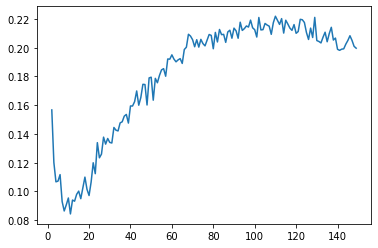

In [134]:
plt.plot(ks, acc)

In [137]:
km = KMeans(n_clusters=np.argmax(ks)+2)
km.fit(X_train_red)

KMeans(n_clusters=149)

In [142]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
log_reg = SGDClassifier(loss='log', random_state=42)

In [158]:
log_reg.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [166]:
log_reg.score(X_val, y_val)

0.875

In [162]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [163]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [167]:
rf.score(X_val, y_val)

0.9375

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [188]:
Reduce_Predict = Pipeline([
    ('KMeans_Reduce', KMeans(n_init=10, random_state=42)),
    ('RF_Predict', RandomForestClassifier(n_jobs=-1,random_state=42))
])

In [189]:
param_grid = {
    'KMeans_Reduce__n_clusters':range(100, 500, 50)
}

In [190]:
grid_RF = GridSearchCV(Reduce_Predict, param_grid, cv=5, scoring='accuracy', verbose=10)

In [197]:
from sklearn.mixture import BayesianGaussianMixture

In [198]:
gm = BayesianGaussianMixture(n_components=150, n_init=10)

In [199]:
gm.fit(X_train_red)

BayesianGaussianMixture(n_components=150, n_init=10)

In [219]:
new_img = gm.sample(5)[0]

In [220]:
new_img_or = pca.inverse_transform(new_img)

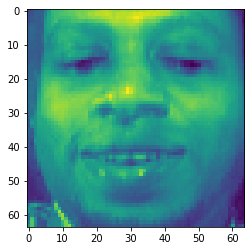

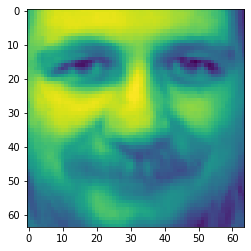

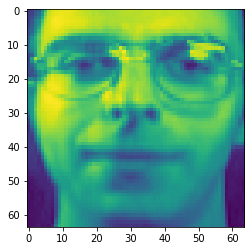

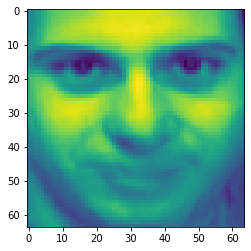

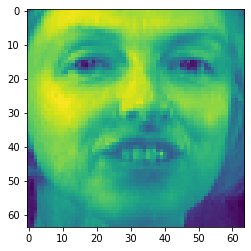

In [221]:
for im in new_img_or:
    plt.imshow(im.reshape(64, 64))
    plt.show()